# Exploratory Data Analysis: US Airlines 1988 - 2018

In [1]:
import vaex
from vaex.ui.colormaps import cm_plusmin

import numpy as np
import pylab as plt
import seaborn as sns

### Adjusting `matplotlib` parameters

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Obtaining the data

The original data can be downloaded from [United States Department of Transportation](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236 "U.S. Department of Transportation"). The selected columns are the same as in this older, better known dataset used for competitions available [here](http://stat-computing.org/dataexpo/2009/the-data.html "dataexpo 2009").

Please refer to [this](https://nbviewer.jupyter.org/github/vaexio/vaex-examples/blob/master/medium-airline-data-eda/airline-original-data-conversion.ipynb "airline data conversion notebook") notebook on how to converd the raw data to the memory-mappable HDF5 format.

### Read in the data

In [3]:
# read in the data
df = vaex.open('./original_data/hdf5/airline_data_1988_2018.hd5')

### Quick insights into the dataset

In [4]:
# Get a high level overview of the DataFrame
df.describe()

,Year,Month,DayOfMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
dtype,int16,int8,int16,int8,str,str,int32,str,str,int16,...,int8,int32,int32,int32,int32,int32,int32,int32,int32,int32
count,183821926,183821926,183821926,183821926,183821926,147156816,183821926,183821926,183821926,183821925,...,183821926,183795899,180136665,144694075,183821926,19923595,19923595,19923595,19923595,19923595
NA,0,0,0,0,0,36665110,0,0,0,1,...,0,26027,3685261,39127851,0,163898331,163898331,163898331,163898331,163898331
mean,2003.6859476273794,6.513381216558464,15.728390529430097,3.9381597057143227,--,--,1684.4972291118308,--,--,1332.076048920715,...,0.0023179171781716615,126.51852634644476,124.53201087074639,105.60806368885527,730.8989127553805,16.530673053733526,2.874630406811622,15.328259533482788,0.09065989345798287,21.535320106637382
std,8.73569,3.42119,8.78432,1.99011,--,--,1644.95,--,--,475.781,...,0.0480889,70.2509,70.2617,68.4631,567.437,44.2425,19.7938,29.8544,2.39507,40.4384
min,1988,1,1,1,--,--,0,--,--,0,...,0,-162,-719,-2378,0,0,0,-60,0,0
max,2018,12,31,7,--,--,9912,--,--,2400,...,1,1865,1440,1399,4983,2580,2692,1848,987,2454


### Filtering on the base `df.describe()`

This filters out the unphisical measurements of durations and distances.

In [5]:
# Keep missing values if they fall within the selection criteria.
df_filtered = df[((df.ActualElapsedTime>=0).fillmissing(True)) &
                 ((df.CRSElapsedTime>=0).fillmissing(True)) &
                 ((df.AirTime>0).fillmissing(True)) & 
                 ((df.Distance > 0).fillmissing(True))]

# Describe the filtered dataset
df_filtered.describe()

,Year,Month,DayOfMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
dtype,int16,int8,int16,int8,str,str,int32,str,str,int16,...,int8,int32,int32,int32,int32,int32,int32,int32,int32,int32
count,183819525,183819525,183819525,183819525,183819525,147154521,183819525,183819525,183819525,183819524,...,183819525,183793498,180134408,144691886,183819525,19923088,19923088,19923088,19923088,19923088
NA,0,0,0,0,0,36665004,0,0,0,1,...,0,26027,3685117,39127639,0,163896437,163896437,163896437,163896437,163896437
mean,2003.6859480242917,6.513388210528778,15.728389544037828,3.938158647727982,--,--,1684.4516931539238,--,--,1332.0765261583422,...,0.0023172511189983765,126.51923827033315,124.53273411818135,105.61354762491658,730.9031452507561,16.529847431281738,2.8741544483465615,15.32819796810615,0.0906549225702361,21.535796509055224
std,8.73574,3.42119,8.78432,1.99011,--,--,1644.9,--,--,475.78,...,0.048082,70.2508,70.2613,68.4402,567.439,44.2407,19.7918,29.8528,2.39494,40.4387
min,1988,1,1,1,--,--,0,--,--,0,...,0,0,0,1,6,0,0,-60,0,0
max,2018,12,31,7,--,--,9912,--,--,2400,...,1,1865,1440,1399,4983,2580,2692,1848,987,2454


## General Exploratory Data Analysis

##### Number of flights per year
Let's start by looking at the number of scheduled flights per year.

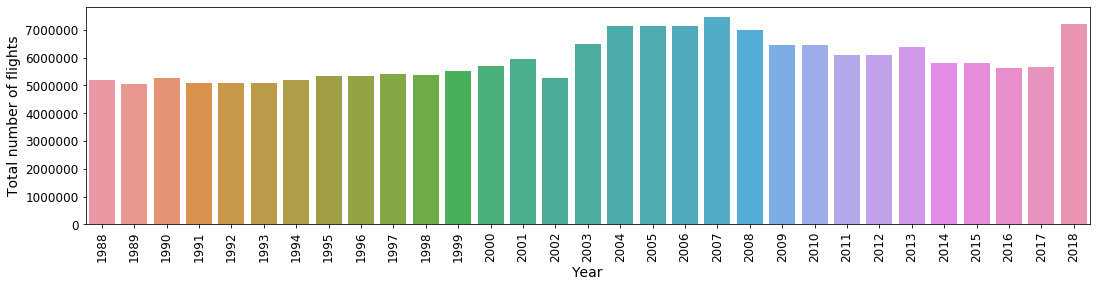

In [6]:
flights_years = df_filtered.Year.value_counts()

plt.figure(figsize=(18,4))
sns.barplot(x=flights_years.index, y=flights_years.values)
plt.xlabel('Year')
plt.ylabel('Total number of flights')
plt.xticks(rotation='vertical')
plt.show()

The dip in flights in 2002 is due to new regulations following the tragedy in 2001. After that, a year or adjustments to the new protocols, number of flights started increasing again.

##### The most busy airports

Find the most busy airports

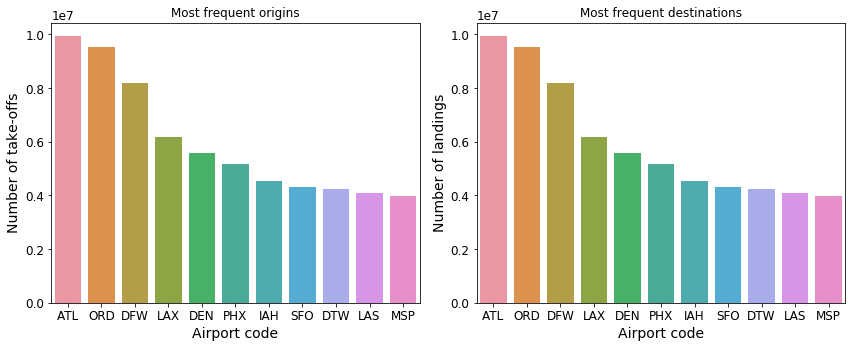

In [7]:
origin_value_counts = df_filtered.Origin.value_counts()
dest_value_counts = df_filtered.Origin.value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.barplot(x=origin_value_counts.index[:11], y=origin_value_counts.values[:11])
plt.title('Most frequent origins')
plt.xlabel('Airport code', fontsize=14)
plt.ylabel('Number of take-offs')

plt.subplot(122)
sns.barplot(x=dest_value_counts.index[:11], y=dest_value_counts.values[:11])
plt.title('Most frequent destinations')
plt.xlabel('Airport code')
plt.ylabel('Number of landings')

plt.tight_layout()
plt.show()

##### When are flights scheduled to depart?

Let's look at the number of flights per day of week and month, as well as the number of flights per hour of day and day of week.

In [8]:
df_filtered['Month'] = df_filtered.Month - 1  # to make it start from 0
df_filtered['DayOfWeek'] = df_filtered.DayOfWeek - 1  # to make it start from 0

# label them as categories
df_filtered.categorize(column='Month')
df_filtered.categorize(column='DayOfWeek')

# Helper lists for labelling the plots 
label_month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
label_day_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

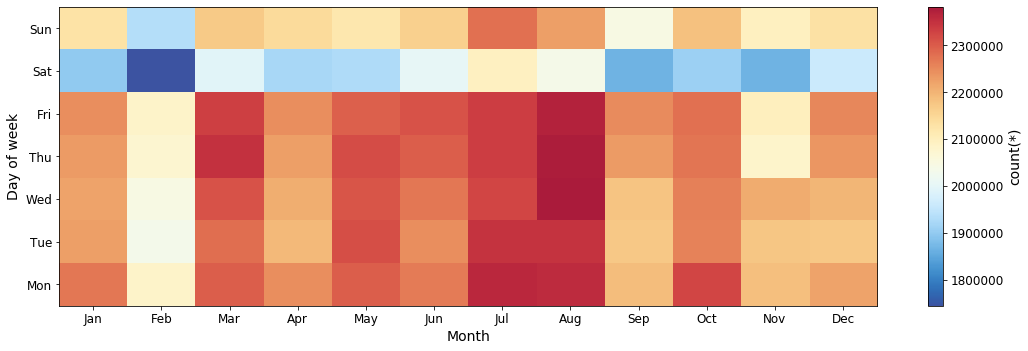

In [9]:
# Plot number of flights per month vs day of week
df_filtered.plot('Month', 'DayOfWeek', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
plt.xticks(np.arange(12), label_month_list)
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Month')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

In [10]:
# Extract CRS Hour of departure
df_filtered['CRSDepHour'] = df_filtered.CRSDepTime // 100 % 24

# Treat as a categorical
df_filtered.categorize(column='CRSDepHour')

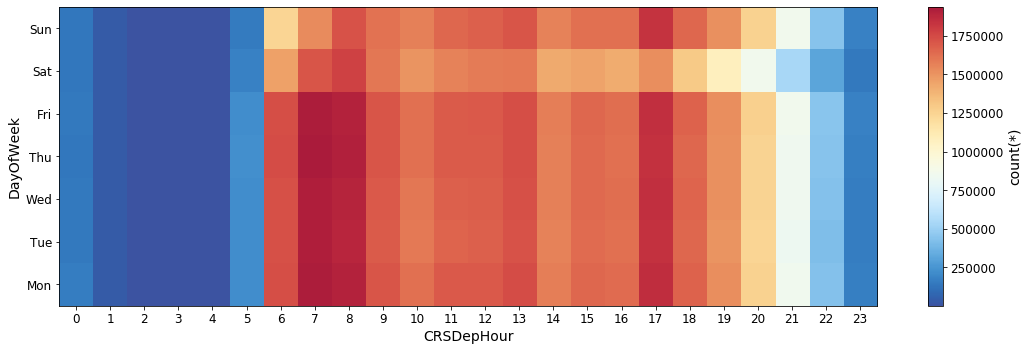

In [11]:
# Plot number of flights per departure hour vs day of week
df_filtered.plot('CRSDepHour', 'DayOfWeek', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.tick_params(labelsize=12)
plt.show()

##### Overall distributions of flight times, distances, and speed.

Now, let's look at the overall distribution of the flight durations, distances and speed of flight. 

For some of the distributions the limits are adjusted to clip obvious outliers due to likely faulty data recordings.

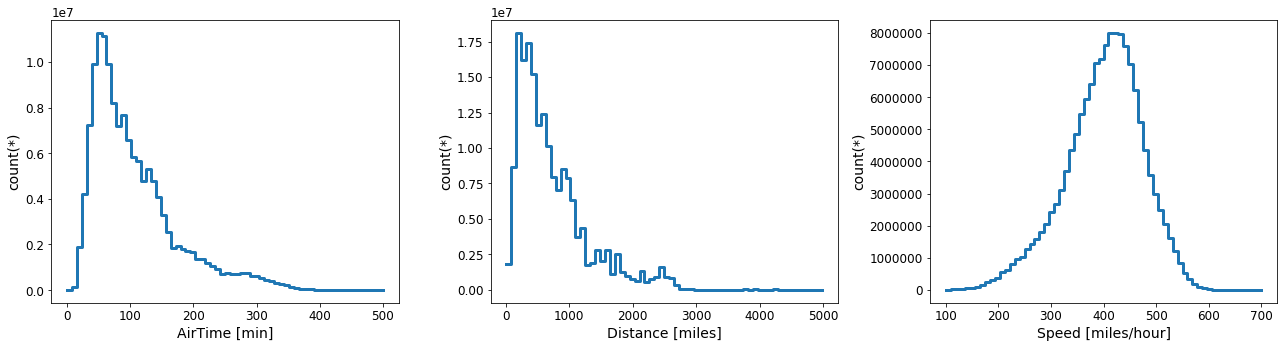

In [12]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
df_filtered.plot1d('AirTime', limits=[0, 500], lw=3, shape=64)
plt.xlabel('AirTime [min]')

plt.subplot(132)
df_filtered.plot1d('Distance', limits='minmax', lw=3, shape=64)
plt.xlabel('Distance [miles]')

plt.subplot(133)
# Calculate the mean speed of the aircraft
df_filtered['Speed'] = df_filtered.Distance / (df_filtered.AirTime/60.)  # this is in miles per hour

df_filtered.plot1d('Speed', limits=[100, 700], lw=3, shape=64)
plt.xlabel('Speed [miles/hour]')

plt.tight_layout()
plt.show()

##### Nearest neighbours

Out of curiositly, let's find which are the closest airports which had a regular connection between them.

In [13]:
# Check if there are frequent flights at uber-short distances
df_filtered[df_filtered.Distance <= 20].Distance.value_counts(progress=True)

[########################################]:  100.00% elapsed time  :        0s =  0.0m =  0.0h
 

11    2710
17      46
18       5
16       3
12       2
10       2
19       1
8        1
6        1
dtype: int64

Ok rather large number of flights for distance of 11 miles. Let's find the airports in question.

In [14]:
# Let's see the origins for this short route
df_filtered[df_filtered.Distance == 11.].Origin.value_counts()

SFO    1615
OAK    1042
JFK      36
LGA      17
dtype: int64

It looks like there are quite a large number of flights between SFO and OAK airports. Let's see how that connection evolved throughout the years.

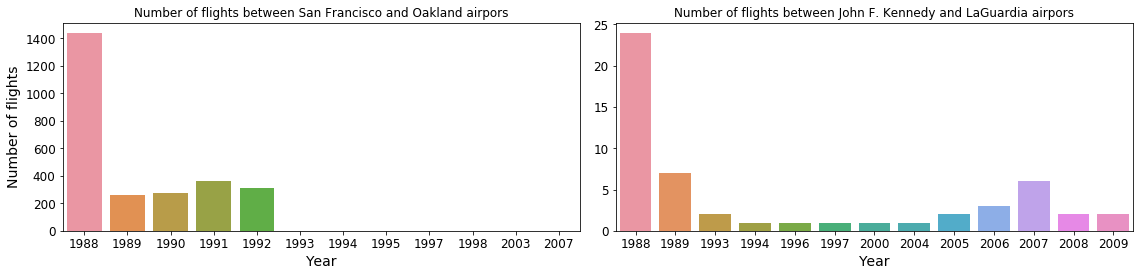

In [15]:
# How the number of the shortest destination flights evolved through the years
nf_sfo_oak = df_filtered[(df_filtered.Distance == 11.) & ((df_filtered.Origin=='SFO') | (df_filtered.Origin == 'OAK'))]['Year'].value_counts()
nf_jfk_lga = df_filtered[(df_filtered.Distance == 11.) & ((df_filtered.Origin=='JFK') | (df_filtered.Origin == 'LGA'))]['Year'].value_counts()

# plot it
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)

sns.barplot(nf_sfo_oak.index, nf_sfo_oak.values, ax=ax1)
sns.barplot(nf_jfk_lga.index, nf_jfk_lga.values, ax=ax2)

ax1.set_title('Number of flights between San Francisco and Oakland airpors')
ax2.set_title('Number of flights between John F. Kennedy and LaGuardia airpors')
ax1.set_ylabel('Number of flights')
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

In Oakland, it looks like a regular connection existed for 5 years! (at least).

In NYC, just a handful of flights scheduled over the years, probably private, or special services.

##### Long distance relationship

Let's find the most distant airports that have a regular connection.

In [16]:
# Check if there are frequent flights at uber-long distances
df_filtered[df_filtered.Distance > 4900].Distance.value_counts(progress=True)

[########################################]:  100.00% elapsed time  :        0s =  0.0m =  0.0h 
 

4962    13045
4983     4863
4963     2070
dtype: int64

So we have few common long distance relations. Let's examine them.

In [17]:
# Group by Origin, Destination and Distance, and count the number of flights
df_filtered[df_filtered.Distance > 4900].groupby(by=['Origin', 'Dest', 'Distance'], agg={'Origin':'count'})

#,Origin,Dest,Distance,count
0,EWR,HNL,4962,6517
1,EWR,HNL,4963,1035
2,HNL,EWR,4962,6528
3,HNL,EWR,4963,1035
4,HNL,JFK,4983,2432
5,JFK,HNL,4983,2431


There are assentially two pairs of airports. Newark (EWR) --- Honolulu (HNL); and John F. Kennedy (JFK) --- Honolulu (HNL)

Notice that between EWR and HNL there are two sets of distances, which are very close to each other. We will examine this in turn. 

Now let's look at the number of flights per year between these airport pairs.

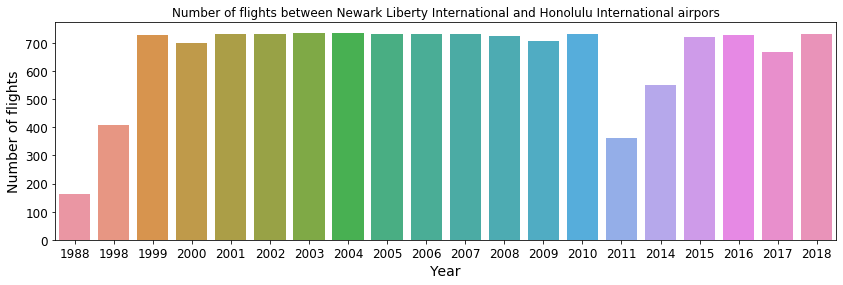

In [18]:
# Flight between Newark and Honolulu airport (the more common distance of 4962 miles)
nf_ewr_nhl = df_filtered[(df_filtered.Distance == 4962)]['Year'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(nf_ewr_nhl.index, nf_ewr_nhl.values)
plt.title('Number of flights between Newark Liberty International and Honolulu International airpors')
plt.ylabel('Number of flights')
plt.xlabel('Year')
plt.show()

# Pretty much 2 per day since 1999

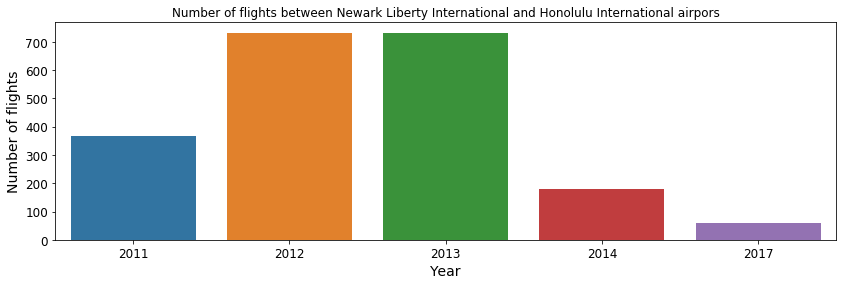

In [19]:
# Flight between Newark and Honolulu airport (the less common distance of 4963 miles)
nf_ewr_nhl = df_filtered[(df_filtered.Distance == 4963)]['Year'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(nf_ewr_nhl.index, nf_ewr_nhl.values)
plt.title('Number of flights between Newark Liberty International and Honolulu International airpors')
plt.ylabel('Number of flights')
plt.xlabel('Year')
plt.show()

# Pretty much 2 per day since 1999

The flights between Honolulu International Airport and Newark Liberty International should travel exactly 4962 miles. However, due to the tragedy in in 2001, the trajectory of the route has been changed slightly, accounting for the change in the distance flown. If we sum up the above two histograms, we can see that the service was never suspended: 
2 flights per day since 1999!

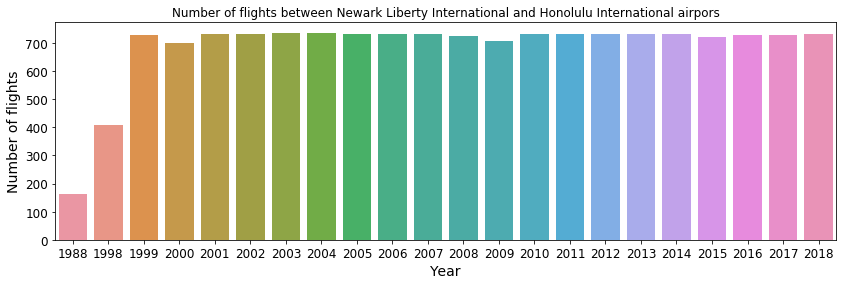

In [20]:
# Flight between Newark and Honolulu  airport (all distances)
nf_ewr_nhl = df_filtered[(df_filtered.Distance == 4962) | 
                         (df_filtered.Distance == 4963)]['Year'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(nf_ewr_nhl.index, nf_ewr_nhl.values)
plt.title('Number of flights between Newark Liberty International and Honolulu International airpors')
plt.ylabel('Number of flights')
plt.xlabel('Year')
plt.show()

# Pretty much 2 per day since 1999

Let's do the same, now of the right JFK --- HNL pair.

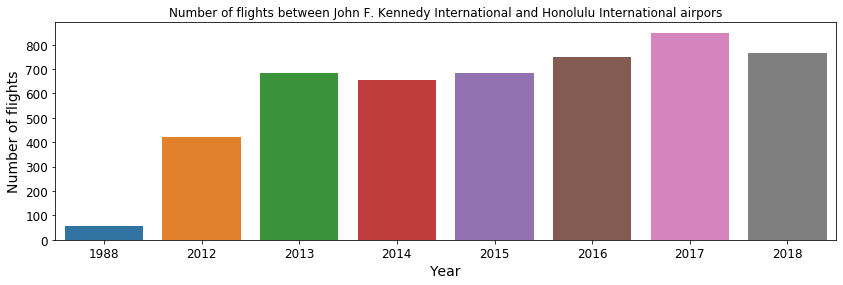

In [21]:
# Flights between John F Kennedy and Honolulu Airpot
nf_jfk_nhl = df_filtered[(df_filtered.Distance == 4983)]['Year'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(nf_jfk_nhl.index, nf_jfk_nhl.values)
plt.title('Number of flights between John F. Kennedy International and Honolulu International airpors')
plt.ylabel('Number of flights')
plt.xlabel('Year')
plt.show()

Pretty much 2 flights per day since 2013 as well. 

### Look at some aggregates of the data & identifying the central transport hubs

There are a lot of airports in this dataset. But most of them do no not contribute much to the over all traffic.

In [22]:
# Start by checking the number of flights per origin
n_flights_per_origin = df_filtered.Origin.value_counts(progress=True)


# See how many of the airports "contribute" to the total traffic.
print('Total number of flights:', n_flights_per_origin.sum())
print('Total number of unique airports:', len(n_flights_per_origin))
_ = n_flights_per_origin[:10].sum() / n_flights_per_origin.sum() * 100
print('Percentage of total flights contributed by the 10 most frequent airports: %.1f%%' % (_))
_ = n_flights_per_origin[:30].sum() / n_flights_per_origin.sum() * 100
print('Percentage of total flights contributed by the 30 most frequent airports: %.1f%%' % (_))
_ = n_flights_per_origin[:50].sum() / n_flights_per_origin.sum() * 100
print('Percentage of total flights contributed by the 50 most frequent airports: %.1f%%' % (_))
_ = n_flights_per_origin[:100].sum() / n_flights_per_origin.sum() * 100
print('Percentage of total flights contributed by the 100 most frequent airports: %.1f%%' % (_))

[########################################]:  100.00% elapsed time  :        6s =  0.1m =  0.0h
 Total number of flights: 183819525
Total number of unique airports: 411
Percentage of total flights contributed by the 10 most frequent airports: 33.6%
Percentage of total flights contributed by the 30 most frequent airports: 64.6%
Percentage of total flights contributed by the 50 most frequent airports: 80.1%
Percentage of total flights contributed by the 100 most frequent airports: 93.1%


Now we wanna turn our attention to just the dominant transport hubs, i.e. the more frequently used airports. 
To do this, let's construct a DataFrame in which we will aggregate some of the flight data that we are interested in, based on the point of Origin of each flight. We will also count the number of flights departing from each Origin. 

From the this grouped DataFrame, let's filter out airports with less than 200_000 departures. The rationale is the following: for an airport to be considered frequently used, we require for it to have, on average, 20 destinations per day, one flight per day for each of the over 30 years. These criteria are of course arbitrary.

In [23]:
# Group by origin, calculate some aggregate stats
df_group_by_origin = df_filtered.groupby(by='Origin', agg={'Year': 'count',
                                                           'Distance': ['mean', 'std'],
                                                           'TaxiIn': ['mean', 'std'],
                                                           'TaxiOut': ['mean', 'std'],
                                                           'DepDelay': ['mean', 'std'],
                                                          })

# Require to have at least 200k flights, to be considered a typical commercial airport 
# (~20 destinations with one flight per day for at least 30 years)
df_group_by_origin = df_group_by_origin[(df_group_by_origin['count'] > 200_000)]
df_group_by_origin

#,Origin,count,Distance_mean,Distance_std,TaxiIn_mean,TaxiIn_std,TaxiOut_mean,TaxiOut_std,DepDelay_mean,DepDelay_std
0,EWR,3859089,949.0571505347506,683.2925150804604,6.838859406285781,5.2516574875636035,25.176960048736476,16.315227934779696,12.16040468644496,36.88187947317769
1,CVG,2236016,609.4698910920137,462.1946183756504,7.084379192896184,25.313514489463852,16.22206424898427,14.008528839181672,7.816483497436057,31.602297095284012
2,IAH,4536870,823.7763056909279,478.1311208961596,6.222613386537248,4.511241307472678,18.27043037853273,10.227049373119087,8.016037724277812,29.73318498885663
3,CMH,1043900,553.7959335185362,419.27614762353124,7.491396621204861,7.516344340461818,12.457756452366263,8.72102111843323,7.867450008695839,33.14990352504729
4,MSP,3991564,781.2819729309113,454.3176216823334,6.767775443591901,5.983795721994184,18.494465320732463,10.732072657149963,7.25238365298468,29.763247664698596
...,...,...,...,...,...,...,...,...,...,...
103,ISP,217621,680.4168439626691,399.45987051857014,5.340379240609876,15.117993471455739,9.534550794316752,6.063978121339791,7.429246477090541,27.84409835266481
104,LBB,236482,330.7310577549243,111.3834323713817,5.9124980334345265,4.882674768768664,8.967333306178974,5.144326845523153,6.31462146038509,27.81948038801572
105,MDW,2036806,683.0181455671282,456.4011863833172,5.485737155429885,5.139088077261766,12.095677916191496,7.944049952532181,11.454665250031036,30.028289049173726
106,JAN,274483,402.2841451018825,160.00579622018353,8.076626032355284,10.868612839525154,10.921605833984447,6.6165198941456795,7.065939519638525,31.954831690328525


Using the aggregations, we can examine, for instance, which are the most far-reaching airports.

In [24]:
# Sort the grouped dataframe by the mean distance, and show the top 10 rows.
df_group_by_origin.sort(by='Distance_mean', ascending=False).head(10)

#,Origin,count,Distance_mean,Distance_std,TaxiIn_mean,TaxiIn_std,TaxiOut_mean,TaxiOut_std,DepDelay_mean,DepDelay_std
0,SJU,702358,1464.27,405.821,8.51326,6.78075,14.767,6.08924,8.07646,38.908
1,HNL,1.01435e+06,1434.64,1461.09,6.24755,4.49869,14.1278,5.32919,3.01592,32.826
2,JFK,2.37464e+06,1329.25,881.625,6.90835,9.6304,28.4205,17.3369,11.6521,39.1827
3,SEA,3.10943e+06,1177.29,632,6.46298,4.91571,15.5762,6.61427,7.46982,28.2154
4,ANC,569356,1171.8,796.034,5.14451,3.55129,12.8845,6.35645,5.93125,30.087
5,OGG,389631,1118.23,1248.24,6.57531,4.92173,8.99997,4.78332,2.52952,34.3253
6,SFO,4.31266e+06,1104.17,870.573,6.67325,5.17686,17.4708,7.7682,10.6094,32.9309
7,LAX,6.17816e+06,1080.4,861.132,6.16223,4.77581,15.6503,7.52632,8.33092,28.1817
8,MIA,2.18468e+06,998.621,502.731,7.6241,6.25082,18.2477,9.4347,10.0096,34.5715
9,EWR,3.85909e+06,949.057,683.293,6.83886,5.25166,25.177,16.3152,12.1604,36.8819


The furthest reaching airports are of course those located in remote places like Hawaii, Alaska, or Puerto Rico. In addition to these, the largest central hubs like LA, NY, SF, Miami are also far-reaching.

Next, let's find the mean distance of all the mean distances in the grouped DataFrame. This gives a "natural" scale between big cities or populare destination for the U.S.; i.e. it gives a sense of the typical separation beteween important destinations. 

In [25]:
# Mean Distance
df_group_by_origin.Distance_mean.mean()
# Median distance
np.median(df_group_by_origin.Distance_mean.values)

597.9130442788901

##### Taxi times

Let's look at the distribution of mean taxi-in and taxi-out times for the frequent airports.

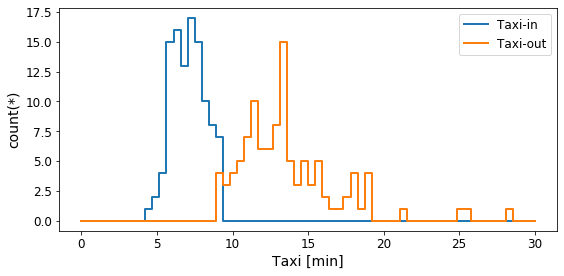

In [26]:
# Taxing
plt.figure(figsize=(8, 4))
df_group_by_origin.plot1d('TaxiIn_mean', limits=[0, 30], lw=2, shape=64, label='Taxi-in')
df_group_by_origin.plot1d('TaxiOut_mean', limits=[0, 30], lw=2, shape=64, label='Taxi-out')
plt.xlabel('Taxi [min]')
plt.legend()
plt.show()

# Taxing out on average takes much longer than Taxing in: 
# makes sense, you don't wait so much once the plane landf, but can often wait on "queue" before taking off

Let's point fingers and find the airports with the shortest and longest taxi times.

In [27]:
# Shortest taxi in
print('Shortest Taxi-In:')
display(
    df_group_by_origin.sort(by='TaxiIn_mean').head(1)
)


# lonest taxi in
print('Longest Taxi-In:')
display(
    df_group_by_origin.sort(by='TaxiIn_mean', ascending=False).head(1)
)


# shortest taxi out:
print('Shortest Taxi-out:')
display(
    df_group_by_origin.sort(by='TaxiOut_mean').head(1)
)

print('Longest Taxi-out:')
display(
    df_group_by_origin.sort(by='TaxiOut_mean', ascending=False).head(1)
)


# DAL - Dallas Love Field Airport (Texas)
# ICT - Wichita Dwight D. Eisenhower (Kansas)
# LBB - Lubbock Preston Smith International Airport (Texas)
# JFK - John F. Kennedy International Airport (NYC)

Shortest Taxi-In:


#,Origin,count,Distance_mean,Distance_std,TaxiIn_mean,TaxiIn_std,TaxiOut_mean,TaxiOut_std,DepDelay_mean,DepDelay_std
0,DAL,1.49833e+06,380.81,270.675,4.30246,3.26236,9.5211,5.72323,9.53513,24.6417


Longest Taxi-In:


#,Origin,count,Distance_mean,Distance_std,TaxiIn_mean,TaxiIn_std,TaxiOut_mean,TaxiOut_std,DepDelay_mean,DepDelay_std
0,ICT,309076,523.074,192.711,9.31726,9.83219,12.2629,8.00531,6.3479,34.5787


Shortest Taxi-out:


#,Origin,count,Distance_mean,Distance_std,TaxiIn_mean,TaxiIn_std,TaxiOut_mean,TaxiOut_std,DepDelay_mean,DepDelay_std
0,LBB,236482,330.731,111.383,5.9125,4.88267,8.96733,5.14433,6.31462,27.8195


Longest Taxi-out:


#,Origin,count,Distance_mean,Distance_std,TaxiIn_mean,TaxiIn_std,TaxiOut_mean,TaxiOut_std,DepDelay_mean,DepDelay_std
0,JFK,2.37464e+06,1329.25,881.625,6.90835,9.6304,28.4205,17.3369,11.6521,39.1827


## Exploratory Data Analysis of the frequent origins

To create a DataFrame containing only the most frequent origins, as selected above, do an inner join between the main DataFrame and the grouped DataFrame, from which the less frequently used airports are already filtered out.

In [28]:
# Now only consider the flights emerging from the top 115 Origins.
df_top_origins = df_filtered.join(other=df_group_by_origin, 
                                  on='Origin', 
                                  how='inner', 
                                  rsuffix='_')

Now let's create a new virtual column (takes no memory!) to indicate whether a flight has been delayed or not. Note that such a column already exists regarding cancellations.

In [29]:
# If a flight is being delayed
df_top_origins['Delayed'] = (df_top_origins.DepDelay > 0).astype('int')

##### Time evolution

Let's see how some of the flight properties change through time. To do this, let's group them by year.

In [30]:
# group by year
df_group_by_year = df_top_origins.groupby(by='Year', 
                                          agg={'Year': 'count',
                                               'Distance': ['mean', 'std'],
                                               'TaxiIn': ['mean', 'std'],
                                               'TaxiOut': ['mean', 'std'],
                                               'DepDelay': ['mean', 'std', 'sum'],
                                               'Cancelled': ['sum'],
                                               'Delayed': ['sum'],
                                               'Diverted': ['sum']})

How have the mean taxi times changed throughout the years. Note that these measurements were not recorded prior to 1995.

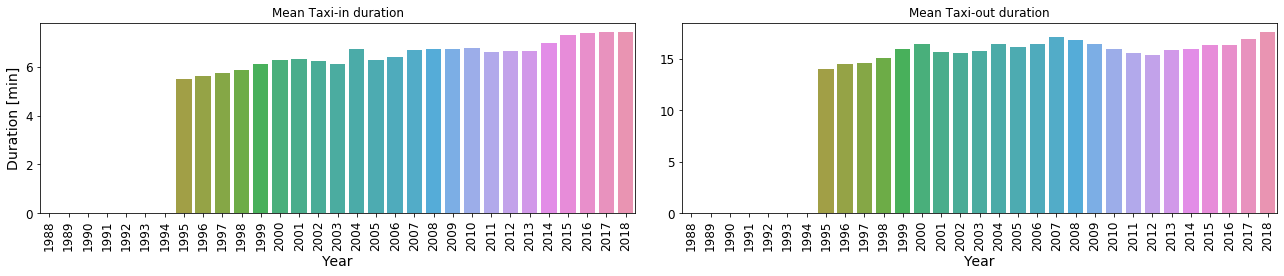

In [31]:
plt.figure(figsize=(18, 4))

plt.subplot(121)
sns.barplot(df_group_by_year.Year.values, df_group_by_year.TaxiIn_mean.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Duration [min]')
plt.title('Mean Taxi-in duration')

plt.subplot(122)
sns.barplot(df_group_by_year.Year.values, df_group_by_year.TaxiOut_mean.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.title('Mean Taxi-out duration')


plt.tight_layout()
plt.show()

The evolution of the mean distance over time. Gives an indication whether airports are connected with more distanant destinations over time.

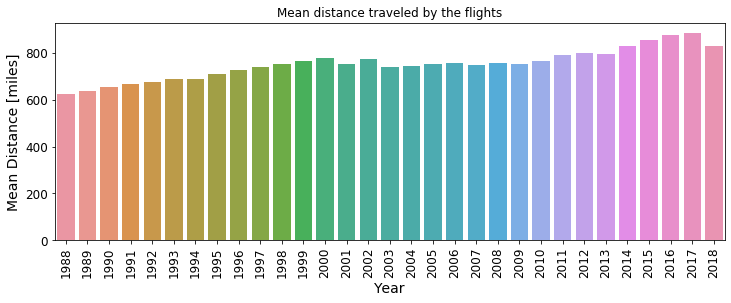

In [32]:
plt.figure(figsize=(12, 4))
sns.barplot(df_group_by_year.Year.values, df_group_by_year.Distance_mean.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Mean Distance [miles]')
plt.title('Mean distance traveled by the flights')
plt.show()

Interesting.. the distance increases with time, then it becomes somewhat stable, and it increases again after 2014. 
Probably new destinations are being added or connected to each other.

### Cancellations and Delays

Now let's turn to something more interesting.. Let's look at the number of flight delays and calncellations over time.

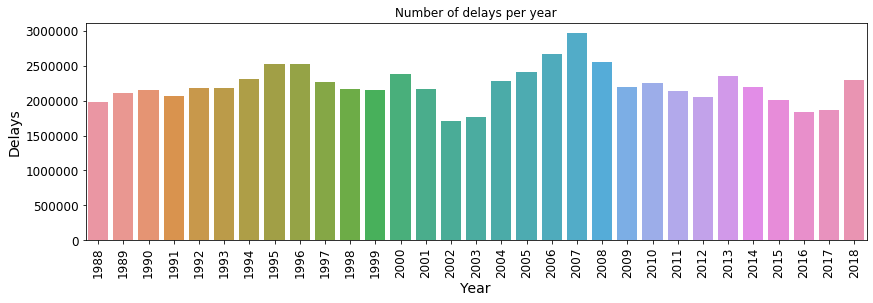

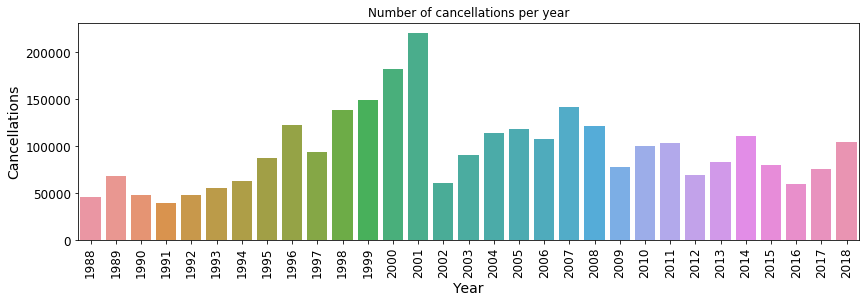

In [33]:
plt.figure(figsize=(14, 4))
sns.barplot(df_group_by_year.Year.values, df_group_by_year.Delayed_sum.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Delays')
plt.title('Number of delays per year')
plt.show()

plt.figure(figsize=(14, 4))
sns.barplot(df_group_by_year.Year.values, df_group_by_year.Cancelled_sum.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Cancellations')
plt.title('Number of cancellations per year')
plt.show()

Find the total number of cancellations per year for each cancellation type, for these most common airports.

First let's check if the number of cancellations and cancellation codes match:

In [34]:
# Number of flights that have cancellation codes:
df_top_origins.CancellationCode.value_counts(progress=True)

[########################################]:  100.00% elapsed time  :        8s =  0.1m =  0.0h 
 

missing    171269977
             1091693
B             216133
A             147315
C              75065
D                257
dtype: int64

We see that there are two types of "missing" values in the case of Cancellation codes. One is an empty string, another is masked values. Let's look if either show any indication of cancelled flights.

In [35]:
# There are cancellation codes that are empty strings. Let's see what they contain
df_top_origins[df_top_origins.CancellationCode==''].Cancelled.value_counts(progress=True)

# So in the current dataset, all cancellation codes that are empty strings are flights which were not cancelled.

[########################################]:  100.00% elapsed time  :        4s =  0.1m =  0.0h
 

0    1091693
dtype: int64

So in the current dataset, all cancellation codes that are empty strings are flights which were not cancelled.

Now let's do the same for the masked values.

In [36]:
# Check for cancelled flights masked values of the cancellation codes
df_top_origins[df_top_origins.CancellationCode.ismissing()].Cancelled.value_counts(progress=True)

# So there are 2_547_952 flights which were cancelled, for which there is no cancellation code.

[########################################]:  100.00% elapsed time  :        3s =  0.1m =  0.0h 
 

0    168722025
1      2547952
dtype: int64

So there are 2_547_952 flights which were cancelled, for which there is no cancellation code. We will interpret this as "reason unknown" and will simply ignore these.

Next up, let's check the total number of cancelled flights.

In [37]:
# Check the total number of cancelled flights
df_top_origins.Cancelled.value_counts(progress=True)

[########################################]:  100.00% elapsed time  :        1s =  0.0m =  0.0h
 

0    169813731
1      2986709
dtype: int64

Let's check for consistency: the total number of cancelled flights should be equal to the sum of known cancellation codes (A, B, C, D) + the cancelled flights with unknown cancellation code.

In [38]:
# Check for consistency
# Sum the value counts from the different cancellation codes + those of cancelled flights with missing codes
print(2547952 + 216133 + 147315 + 75065 + 257 - 2986709)

13


This means that there are 13 flights that do have a cancellation code, but where not marked as cancelled. 
Let's check this in another way: count the number of flights which were _not_ cancelled, but have any sort of cancellation code. 

In [39]:
# This means that there are probably (13?) flights that do have a cancellation code which were not cancelled.
# let's verify that
((df_top_origins.Cancelled == 0) & ((df_top_origins.CancellationCode == 'A') |
                                    (df_top_origins.CancellationCode == 'B') |
                                    (df_top_origins.CancellationCode == 'C') |
                                    (df_top_origins.CancellationCode == 'D'))).sum()
# This is such a small discrepancy, we decide to let is slide.
# In the following analysis of the cancellation code, we will ignore the unknown reason for the cancelled flights
# with unspecified cancellation code

array(13)

We recover the same number of flights (13) which do have a cancellation code, but were marked as not cancelled. This is such a small discrepancy, we decide to ignore it for the present analysis.

Now that we have all this figured out: Let's count the number of cancelled flights for each reason per year. Note that the cancellation code as a field in the dataset was introduced in 2003, so we don't need to consider earlier years for this gruoping.

In [40]:
# Now groupby year and a cancellation code
# The cancellation code was introduced in the database after 2002, hence the filtering
df_year_cancel = df_top_origins[df_top_origins.Year > 2002].groupby(by=['Year', 'CancellationCode'], 
                                                                    agg={'Cancelled': ['sum']})

# Keep only the portion of the DataFrame that contains a proper cancellation code:
df_year_cancel = df_year_cancel[~((df_year_cancel.CancellationCode == '') | 
                                  (df_year_cancel.CancellationCode == 'null') )]

Let's add more meaningful names to the cancellation codes. The designations come from the documentation available at the archive from which this dataset was obtained.

In [41]:
# Add more meaningful names to the cancellation codes
canc_code_mapper = {'A': 'carrier', 
                    'B': 'weather', 
                    'C': 'National Airspace System', 
                    'D': 'Security'}
df_year_cancel['CancellationCode_'] = df_year_cancel.CancellationCode.map(canc_code_mapper, allow_missing=False)

Now let's make a plot showing the number of cancellations, per season, per year. The `seaborn` library is quite useful for this.

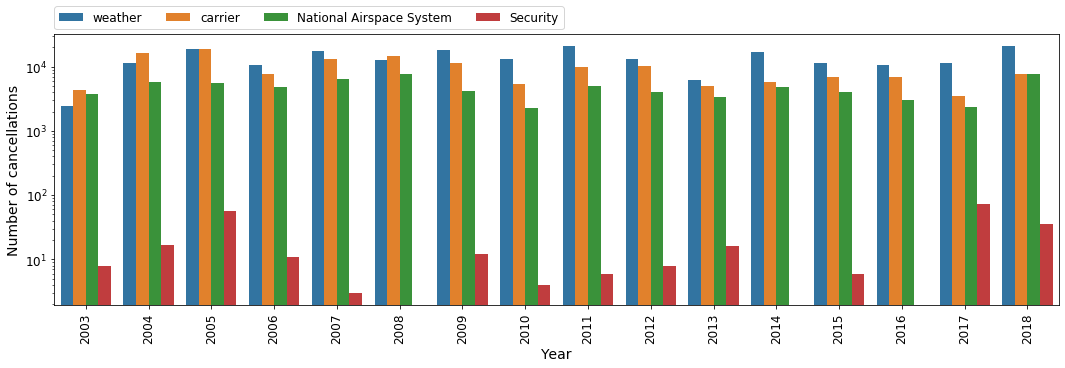

In [42]:
plt.figure(figsize=(18, 5))
sns.barplot(x='Year',
            y='Cancelled_sum', 
            hue='CancellationCode_', 
            data=df_year_cancel.to_pandas_df(virtual=True), 
            palette=sns.color_palette(['C0', 'C1', 'C2', 'C3', 'C6']))
            
plt.yscale('log')
plt.legend(bbox_to_anchor=(0.00, 1.1), loc=2, borderaxespad=0., ncol=4)
plt.xticks(rotation='vertical')
plt.ylabel('Number of cancellations')
plt.show()

Let's point fingers again and see at which airports flights experience the most delays and cancellations.

In [43]:
# groupby origin to investigate popular cancellations
df_group_by_origin_cancel = df_top_origins.groupby(by='Origin').agg({'Delayed': ['count', 'sum'],
                                                                     'Cancelled': ['sum']})

Let's add a couple of new features: the percentage of flights that are delayed or cancelled, for each Origin. Then plot the results.

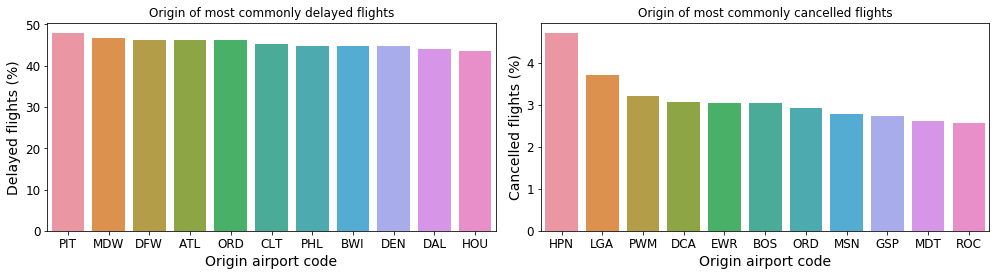

In [44]:
df_group_by_origin_cancel['delayed_perc'] = df_group_by_origin_cancel.Delayed_sum/df_group_by_origin_cancel['count'] * 100.
df_group_by_origin_cancel['cancelled_perc'] = df_group_by_origin_cancel.Cancelled_sum/df_group_by_origin_cancel['count'] * 100.


plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.barplot(df_group_by_origin_cancel.sort(by='delayed_perc', ascending=False)['Origin'].tolist()[:11],
            df_group_by_origin_cancel.sort(by='delayed_perc', ascending=False)['delayed_perc'].tolist()[:11])
# plt.xticks(rotation='vertical')
plt.xlabel('Origin airport code')
plt.ylabel('Delayed flights (%)')
plt.title('Origin of most commonly delayed flights')

plt.subplot(122)
sns.barplot(df_group_by_origin_cancel.sort(by='cancelled_perc', ascending=False)['Origin'].tolist()[:11],
            df_group_by_origin_cancel.sort(by='cancelled_perc', ascending=False)['cancelled_perc'].tolist()[:11])
# plt.xticks(rotation='vertical')
plt.xlabel('Origin airport code')
plt.ylabel('Cancelled flights (%)')
plt.title('Origin of most commonly cancelled flights')


plt.tight_layout()
plt.show()

Pittsburgh International (PIT), Chicago Midway International (MDW) and Dallas International (DFW) are the top 3 airports with the largest percentage of delayed flights.

Westchester County Airport (HPN), LaGuardia Airport (LGA) and Portland International Jetport (PWM) are the top 3 airports with the largest percentage of cancelled flights.

Now let's reaaaaly point figures and figure out which Carriers experience the most delays and cancellations, regardless of the point of origin. 

In [45]:
# groupby origin to investigate popular cancellations
df_group_by_carrier_cancel = df_top_origins.groupby(by='UniqueCarrier', agg={'Delayed': ['count', 'sum'],
                                                                             'Cancelled': ['sum']})

# Add new features: percentage of flights cancelled or delayed
df_group_by_carrier_cancel['delayed_perc'] = df_group_by_carrier_cancel.Delayed_sum/df_group_by_carrier_cancel['count'] * 100.
df_group_by_carrier_cancel['cancelled_perc'] = df_group_by_carrier_cancel.Cancelled_sum/df_group_by_carrier_cancel['count'] * 100.


To attach the carrier names we will use tha airline carrier auxiliary table from http://stat-computing.org/dataexpo/2009/supplemental-data.html. Now, this website is rather old, so it is possible tha some airlines have merged or for some reason has obtained new code, or maybe new airlines have emerged. Bottom line is, it may not be complete, but let's try it out here anyway.

In [46]:
# Load the carrier name data
aux_df_carrers = vaex.from_csv('./data/aux-carriers.csv', copy_index=False)

# Create a mapper
mapper_carriers = dict(zip(aux_df_carrers.Code.values, aux_df_carrers.Description.values))

# Do the mapping
df_group_by_carrier_cancel['CarrierName'] = df_group_by_carrier_cancel.UniqueCarrier.map(mapper=mapper_carriers)

In [47]:
# Some of the carriers have very long names, so let's shorten them a bit
df_group_by_carrier_cancel['CarrierName_short'] = df_group_by_carrier_cancel.CarrierName.str.slice(start=0, stop=23)

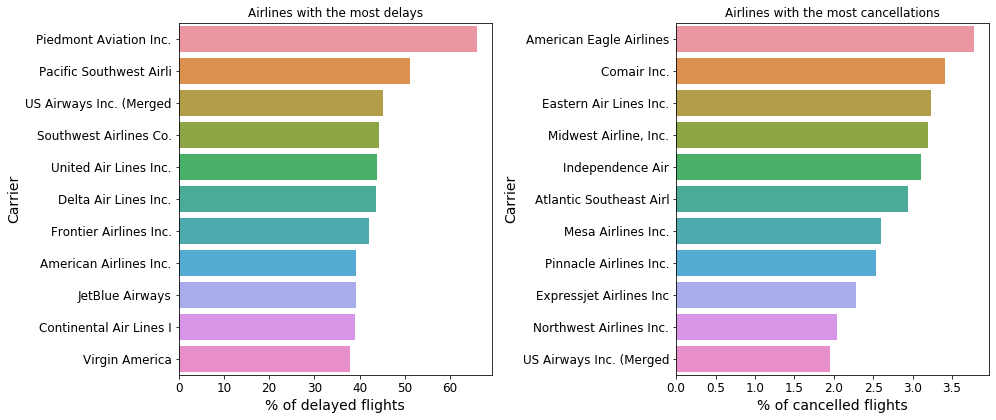

In [48]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
sns.barplot(df_group_by_carrier_cancel.sort(by='delayed_perc', ascending=False)['delayed_perc'].tolist()[:11],
            df_group_by_carrier_cancel.sort(by='delayed_perc', ascending=False)['CarrierName_short'].tolist()[:11])
plt.ylabel('Carrier')
plt.xlabel('% of delayed flights')
plt.title('Airlines with the most delays')

plt.subplot(122)
sns.barplot(df_group_by_carrier_cancel.sort(by='cancelled_perc', ascending=False)['cancelled_perc'].tolist()[:11],
            df_group_by_carrier_cancel.sort(by='cancelled_perc', ascending=False)['CarrierName_short'].tolist()[:11])
plt.ylabel('Carrier')
plt.xlabel('% of cancelled flights')
plt.title('Airlines with the most cancellations')


plt.tight_layout()
plt.show()

Enough of pointing fingers, let's give some kudos. Let's determine which airlines have the fewest delays and cancellations. 

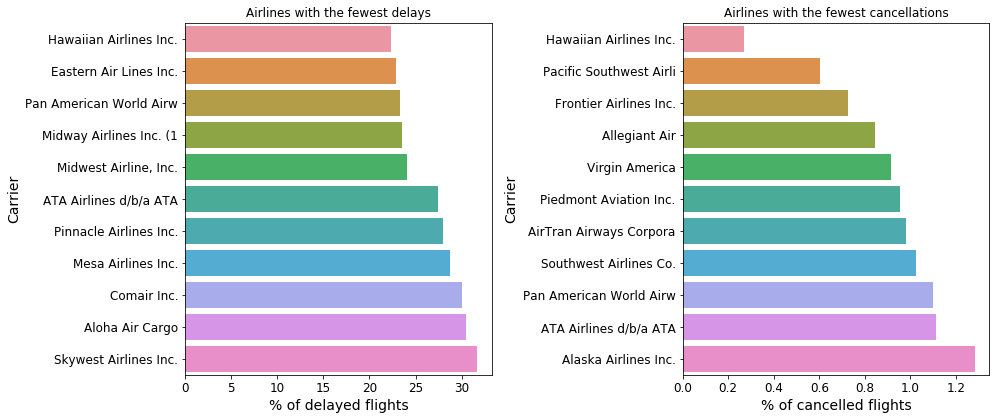

In [49]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
sns.barplot(df_group_by_carrier_cancel.sort(by='delayed_perc', ascending=True)['delayed_perc'].tolist()[:11],
            df_group_by_carrier_cancel.sort(by='delayed_perc', ascending=True)['CarrierName_short'].tolist()[:11])
plt.ylabel('Carrier')
plt.xlabel('% of delayed flights')
plt.title('Airlines with the fewest delays')

plt.subplot(122)
sns.barplot(df_group_by_carrier_cancel.sort(by='cancelled_perc', ascending=True)['cancelled_perc'].tolist()[:11],
            df_group_by_carrier_cancel.sort(by='cancelled_perc', ascending=True)['CarrierName_short'].tolist()[:11])
plt.ylabel('Carrier')
plt.xlabel('% of cancelled flights')
plt.title('Airlines with the fewest cancellations')


plt.tight_layout()
plt.show()

"Safest" airlies in terms of delays or cancellations are the Hawaian. Makes sense, not much traffic jam happening on the islands, and if flights go outside, they travel a long way to they are probably better cared for.

##### More connected than ever

Next up, let's see the mean number of unique destinations each airport connects to, and how this number evoluves through time. 

In [50]:
# Aggregate the number of unique destination for each origin for each year
tmp_group = df_top_origins.groupby(by=['Year', 'Origin'], agg={'Year': 'count',
                                                               'Dest': [vaex.agg.nunique(df_top_origins.Dest, 
                                                                                         dropna=True)]})
# Calculate the mean number of destinations for all origins per year
df_mean_num_dest = tmp_group.groupby('Year').agg({'Dest_nunique': ['mean']})

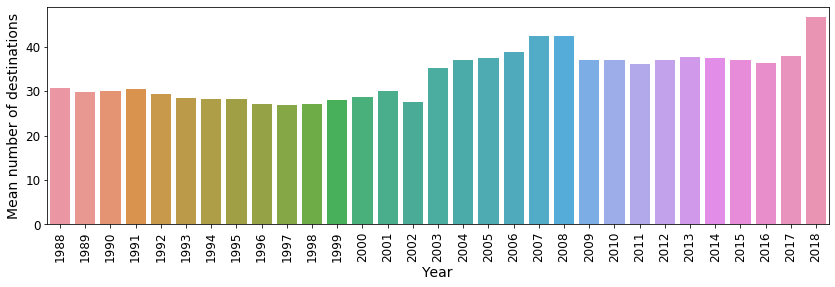

In [51]:
plt.figure(figsize=(14, 4))
sns.barplot(x=df_mean_num_dest.Year.values, y=df_mean_num_dest.Dest_nunique_mean.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Mean number of destinations')
plt.show()

A surge of new destinations in 2018! The world is getting more connected than ever.

##### Airplane performance

Let's take the auxiliary plane data from http://stat-computing.org/dataexpo/2009/supplemental-data.html and look at the typical performance of the aircraf used. 

**Warning**: this data is certainly out of date by now. 

In [52]:
# Load the data about the airplane models
aux_df_planes = vaex.from_csv(filename_or_buffer='./data/aux-plane-data.csv', copy_index=False)

# A more convenient display of the model/type of each plane
aux_df_planes['model_type'] = aux_df_planes.manufacturer + ' ' + aux_df_planes.model

In [53]:
# Join to the auxiliary plance data to the _df_top_origins DataFrame
df_top_origins_aux = df_top_origins.join(other=aux_df_planes, 
                                         left_on='TailNum', 
                                         right_on='tailnum', 
                                         how='left',
                                         rsuffix='_')

Let's make a group based on the model type of the aircrafs used. We are interested in the typical speed and distance travelled by each model.

In [54]:
# Group by model type
df_model_type = df_top_origins_aux.groupby(by='model_type', 
                                           agg={'Speed': 'mean', 'Distance': 'mean'})

Let's display the fastest and furthest reaching aircraft models (on average)

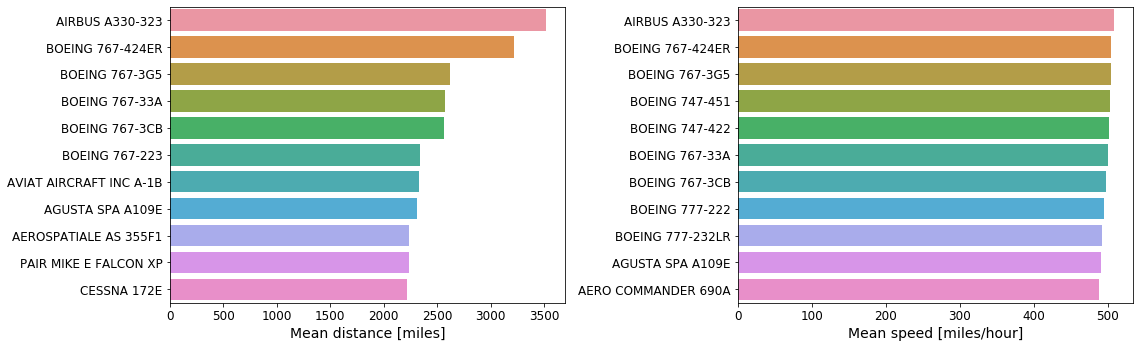

In [55]:
# Sort and plot the top 11 fastest and far reaching aircraft. 
model_top_speed = df_model_type.sort(by='Speed', ascending=False)[['model_type', 'Speed']]
model_top_distance = df_model_type.sort(by='Distance', ascending=False)[['model_type', 'Distance']]

plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x=model_top_distance.Distance[:11].tolist(), 
            y=model_top_distance.model_type[:11].tolist())
plt.xlabel('Mean distance [miles]')

plt.subplot(122)
sns.barplot(x=model_top_speed.Speed[:11].tolist(), 
            y=model_top_speed.model_type[:11].tolist())
plt.xlabel('Mean speed [miles/hour]')

plt.tight_layout()
plt.show()

### Thank you for having a look! :)